In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np


btc_data = pd.read_csv('./btc_usdt.csv', index_col='datetime')
model = models.load_model('model_final_1m.h5')

In [16]:
btc_data = btc_data.to_numpy()
btc_data

array([[4.6855500e+03, 4.6855500e+03, 4.6855500e+03, 4.6855500e+03,
        0.0000000e+00],
       [4.6577600e+03, 4.6577600e+03, 4.6577600e+03, 4.6577600e+03,
        1.1295680e+00],
       [4.6704900e+03, 4.6704900e+03, 4.6704900e+03, 4.6704900e+03,
        1.3184150e+00],
       ...,
       [3.6913140e+04, 3.6920360e+04, 3.6806660e+04, 3.6838000e+04,
        8.1888986e+01],
       [3.6837060e+04, 3.6854090e+04, 3.6761210e+04, 3.6777120e+04,
        8.3429334e+01],
       [3.6777120e+04, 3.6827730e+04, 3.6775000e+04, 3.6803700e+04,
        7.9670359e+01]])

In [17]:
def MinMaxScaler(data):
    numerator = data - np.min(data, axis = 0)
    denominator = np.max(data, 0) - np.min(data, axis = 0)
    # 0으로 나누는 걸 방지하기 위해 노이즈 추가
    return numerator / (denominator + 1e-7), np.min(data, axis = 0), np.max(data, 0)

btc_data_scaled, minVec, maxVec = MinMaxScaler(btc_data)

btc_data_x = btc_data_scaled
btc_data_y = btc_data_scaled[:, [-2]]

In [18]:
btc_data_x

array([[2.99427142e-02, 2.99166452e-02, 3.02021217e-02, 3.01461691e-02,
        0.00000000e+00],
       [2.94942714e-02, 2.94685928e-02, 2.97529408e-02, 2.96978204e-02,
        3.16925872e-04],
       [2.96996934e-02, 2.96738359e-02, 2.99587009e-02, 2.99031993e-02,
        3.69911173e-04],
       ...,
       [5.49994191e-01, 5.49631755e-01, 5.49388482e-01, 5.48876305e-01,
        2.29758087e-02],
       [5.48766500e-01, 5.48563298e-01, 5.48653855e-01, 5.47894100e-01,
        2.34079882e-02],
       [5.47799258e-01, 5.48138301e-01, 5.48876749e-01, 5.48322927e-01,
        2.23533227e-02]])

In [7]:
seq_len = 120
btc_data_x = btc_data_x[:121, :]
btc_data_y = btc_data_y[:121, :]
btc_data_x

array([[2.99427142e-02, 2.99166452e-02, 3.02021217e-02, 3.01461691e-02,
        0.00000000e+00],
       [2.94942714e-02, 2.94685928e-02, 2.97529408e-02, 2.96978204e-02,
        3.16925872e-04],
       [2.96996934e-02, 2.96738359e-02, 2.99587009e-02, 2.99031993e-02,
        3.69911173e-04],
       [2.98726803e-02, 2.98466723e-02, 3.01319725e-02, 3.00761499e-02,
        7.57548926e-05],
       [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
        2.70427130e-05],
       [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
        1.36474739e-04],
       [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
        0.00000000e+00],
       [2.95626916e-02, 2.95369534e-02, 2.98214736e-02, 2.97662262e-02,
        3.36799393e-06],
       [2.98531548e-02, 2.98271637e-02, 2.99507808e-02, 2.98952939e-02,
        5.44622913e-04],
       [2.96917863e-02, 2.96659358e-02, 2.99507808e-02, 2.98952939e-02,
        0.00000000e+00],
       [2.96917863e-02, 2.9665

In [8]:
dataX = []
dataY = []
for i in range(0, len(btc_data_x) - seq_len):
    _x = btc_data_x[i:i + seq_len]
    _y = btc_data_y[i+seq_len]
    #print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

In [9]:
dataX

[array([[2.99427142e-02, 2.99166452e-02, 3.02021217e-02, 3.01461691e-02,
         0.00000000e+00],
        [2.94942714e-02, 2.94685928e-02, 2.97529408e-02, 2.96978204e-02,
         3.16925872e-04],
        [2.96996934e-02, 2.96738359e-02, 2.99587009e-02, 2.99031993e-02,
         3.69911173e-04],
        [2.98726803e-02, 2.98466723e-02, 3.01319725e-02, 3.00761499e-02,
         7.57548926e-05],
        [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
         2.70427130e-05],
        [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
         1.36474739e-04],
        [2.95759238e-02, 2.95501741e-02, 2.98347276e-02, 2.97794557e-02,
         0.00000000e+00],
        [2.95626916e-02, 2.95369534e-02, 2.98214736e-02, 2.97662262e-02,
         3.36799393e-06],
        [2.98531548e-02, 2.98271637e-02, 2.99507808e-02, 2.98952939e-02,
         5.44622913e-04],
        [2.96917863e-02, 2.96659358e-02, 2.99507808e-02, 2.98952939e-02,
         0.00000000e+00],
        [2

In [10]:
dataX = np.array(dataX)
dataY = np.array(dataY)
pred = model.predict(dataX, verbose=1)

1/1 [==============================] - 0s 2ms/step


In [12]:
dataY_origin = minVec[-2] + dataY * (maxVec[-2] - minVec[-2])
pred_origin = minVec[-2] + pred * (maxVec[-2] - minVec[-2])

dataY_origin, pred_origin

(array([[4684.98]]), array([[4751.364]], dtype=float32))

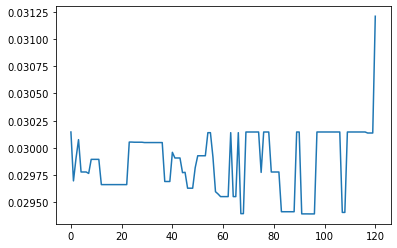

In [123]:
import matplotlib.pyplot as plt

dataX[0][:, -2], pred
plotTest = dataX[0][:, -2]
plotTest = np.append(plotTest, pred)

plt.plot(plotTest)
plt.show()

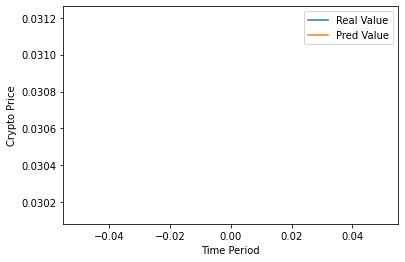

In [111]:
plt.plot(dataY, label='Real Value')
plt.plot(pred, label='Pred Value')
plt.xlabel("Time Period")
plt.ylabel("Crypto Price")
plt.legend()
plt.show()